<a href="https://colab.research.google.com/github/SHRUTIGARG90567/classification-chap-3/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, parser = "auto")

In [ ]:
x , y =  mnist['data'] , mnist['target']

print(x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape 

(70000,)

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
 

In [ ]:
some_image = x.to_numpy()[36001]

In [ ]:
some_image_digit = some_image.reshape(28, 28)

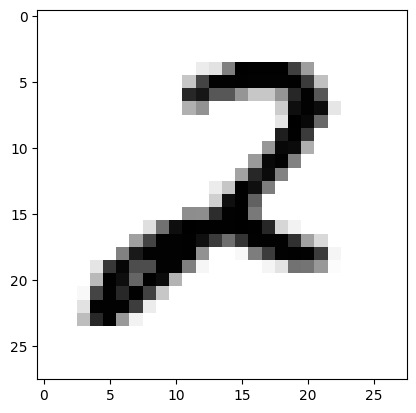

In [ ]:
plt.imshow(some_image_digit ,cmap=matplotlib.cm.binary,
           interpolation='nearest')

In [ ]:
y[36001]

'2'

In [ ]:
# splitting the code

In [ ]:
x_train , x_test  = x[:60000] , x[60000:]

In [ ]:
 y_train , y_test =  y[:60000], y[60000:]

In [ ]:
import numpy as np

In [ ]:
shuffle_index = np.random.permutation(60000)
x_train = x_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

In [ ]:
# binary claifier

In [ ]:
y_train_7 = (y_train == '2')
y_test_7 = (y_test == '2')

In [ ]:
y_test

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
x.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier (random_state = 42)
clf.fit(x_train, y_train_7)

SGDClassifier(random_state=42)

In [ ]:
clf.predict([some_image])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
# performance measure 

In [ ]:
# measureing acuracy usinng cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score  ### use to find the score

In [ ]:
aa= cross_val_score(clf, x_train, y_train_7, cv=3, scoring="accuracy")

In [ ]:
aa.mean()

0.9698166666666667

In [ ]:
# confution matrix

In [ ]:
from sklearn.model_selection import cross_val_predict  ### use to predict 
y_train_pre  = cross_val_predict(clf, x_train, y_train_7, cv=3)

In [ ]:
y_train_pre 

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix # of sample 
confusion_matrix (y_train_7, y_train_pre)

array([[52841,  1201],
       [  610,  5348]])

In [ ]:
confusion_matrix (y_train_7, y_train_7) # perfect prediction

array([[54042,     0],
       [    0,  5958]])

In [ ]:
from sklearn.metrics import precision_score , recall_score, f1_score

In [ ]:
precision_score(y_train_7, y_train_pre)

0.8166132233928844

In [ ]:
recall_score(y_train_7, y_train_pre)

0.8976166498825109

In [ ]:
 f1_score(y_train_7, y_train_pre)

0.855201087391061

In [ ]:
# precision/recall tradeoff

In [ ]:
y_score = clf.decision_function([some_image])# use to carry out the decision 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_score

array([624.1885662])

In [ ]:
threshold = 0 
y_train_pre  = (y_score > threshold)      
y_train_pre 

array([ True])

In [ ]:
threshold =200000
y_train_pre  = (y_score > threshold)
y_train_pre 

array([False])

In [ ]:
 y_score = cross_val_predict(clf, x_train, y_train_7, cv=3 , method = "decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions ,recalls, thresholds  = precision_recall_curve(y_train_7, y_score)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_precision_recall_vs_threshold (precisions ,recalls, thresholds):
    plt.plot(thresholds, precisions [:-1], "b--", label = "precision")
    plt.plot(thresholds, recalls [:-1], "g--", label = "recall")
    plt.ylable("threshold")
    plt.legend(loc= "upper left")
    plt.ylim([0,1])

AttributeError: ignored

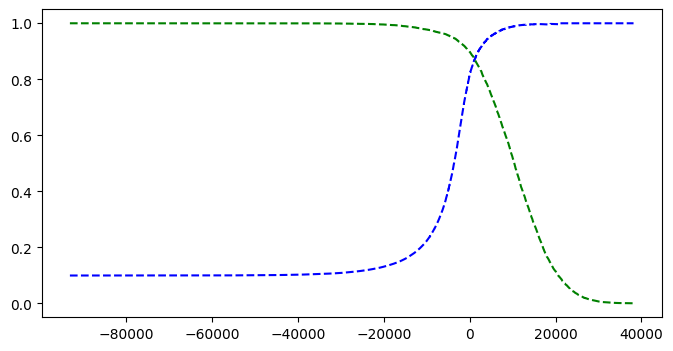

In [ ]:
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.ylabel("threshold")  # Fix the typo here
plt.legend(loc="upper left")
plt.ylim([0, 1])
save_fig("precision_recall_vs_threshold_plot")

In [ ]:
y_train_pred_90 = (y_score> 20000)

In [ ]:
precision_score (y_train_7 , y_train_pred_90)

0.9970674486803519

In [ ]:
recall_score (y_train_7 , y_train_pred_90)

0.11413225914736488

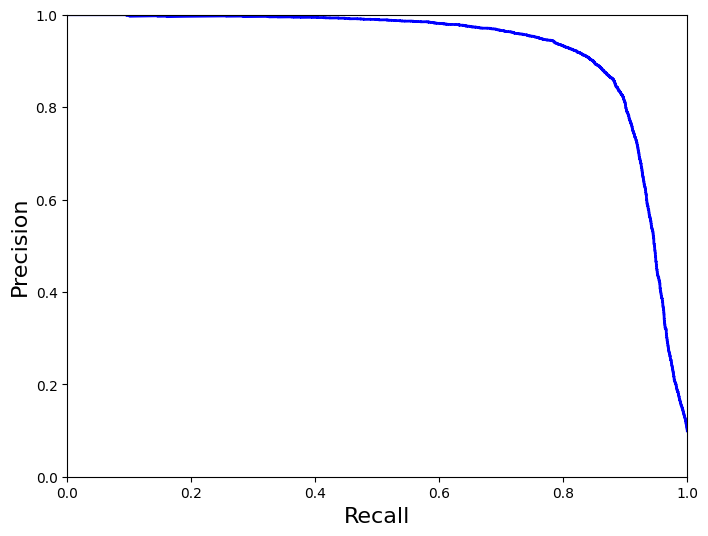

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_7, y_score)

In [ ]:
def plot_roc_curve (fpr, tpr, label= None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

NameError: ignored

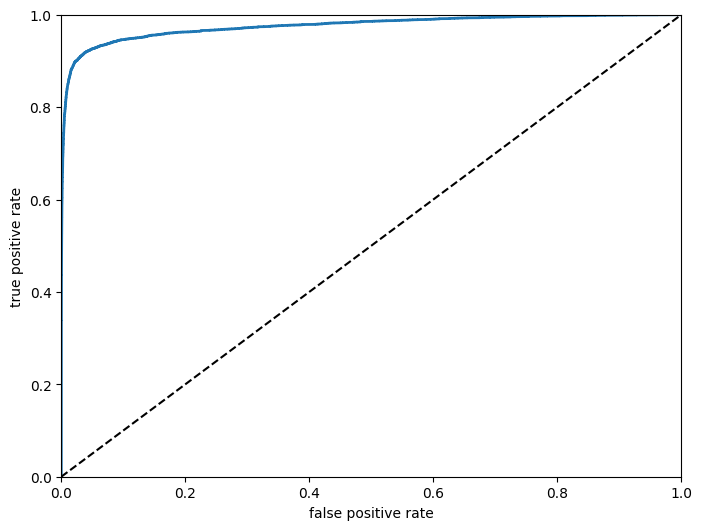

In [ ]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_7, y_score)

0.9758250886859485

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_7, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_7,y_scores_forest)



NameError: ignored

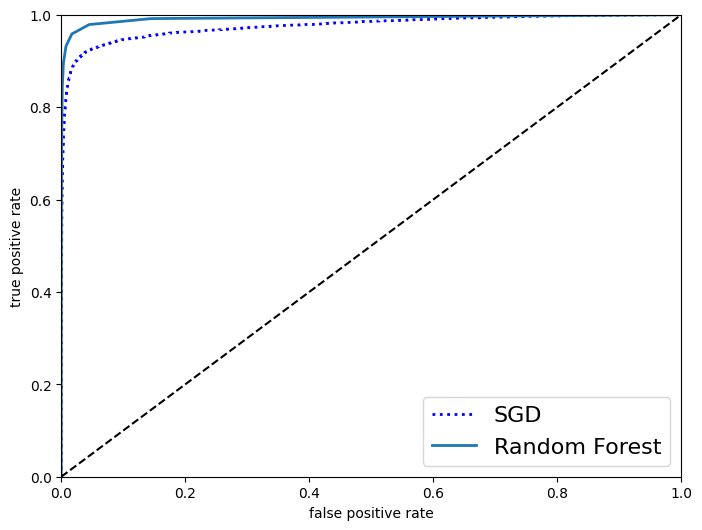

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [ ]:
roc_auc_score(y_train_7, y_scores_forest)

0.9924392474869327

In [ ]:
# use of dummy clasifier

In [ ]:
# this show how to import dummy classifier to evaluate the model performance and 

In [ ]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, x_train, y_train_7, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

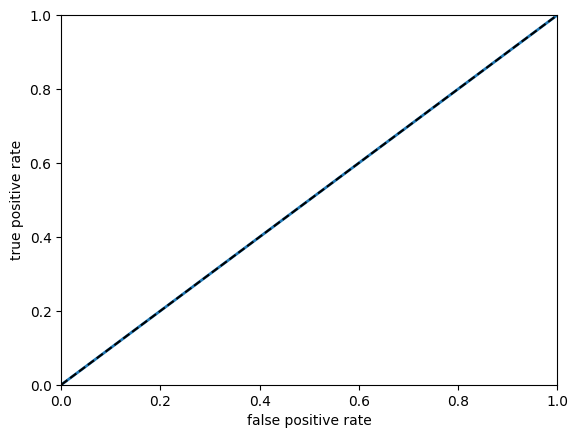

In [ ]:
fprr, tprr, thresholdsr = roc_curve(y_train_7, y_scores_dmy)
plot_roc_curve(fprr, tprr)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [ ]:
y_knn_pred = knn_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

In [ ]:
# code use to sift The code you provided demonstrates a function shift_digit() that uses the shift() function from scipy.ndimage.interpolation to shift a digit image by a specified amount in the x and y directions. Then, it reshapes the shifted image back to a 784-dimensional array and plots the resulting digit using plot_digit()

In [ ]:
# Exercise solutions
#. An MNIST Classifier With Over 97% Accuracy

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)